Loading FastShip dataset...
Dataset loaded successfully, shape: (500, 30)

Stage 1: Canary Release
[2025-12-13 10:15:46] Canary Release - Deployment: Started canary release for new model v2.0
Model version distribution:
deployed_model_version
v1.0    425
v2.0     75
Name: count, dtype: int64

Stage 2: Performance Monitoring

Model version v1.0:
  Record count: 425
  Time prediction error: 1.60 hours
  Cost prediction error: $15.44
  Delay rate: 38.59%

Model version v2.0:
  Record count: 75
  Time prediction error: 1.64 hours
  Cost prediction error: $15.37
  Delay rate: 38.67%
[2025-12-13 10:15:46] Performance Monitoring - Evaluation: Completed model performance evaluation

Stage 3: Ethical Audit

Fairness Audit - Delay rates by customer segment:
  budget: 40.95%
  standard: 37.94%
  premium: 38.10%

Regional Fairness Audit - Delay rates by region:
  central: 41.90%
  east: 30.68%
  south: 42.98%
  west: 34.00%
  north: 41.94%

High-Risk Decision Audit:
  Number of high-risk decisions

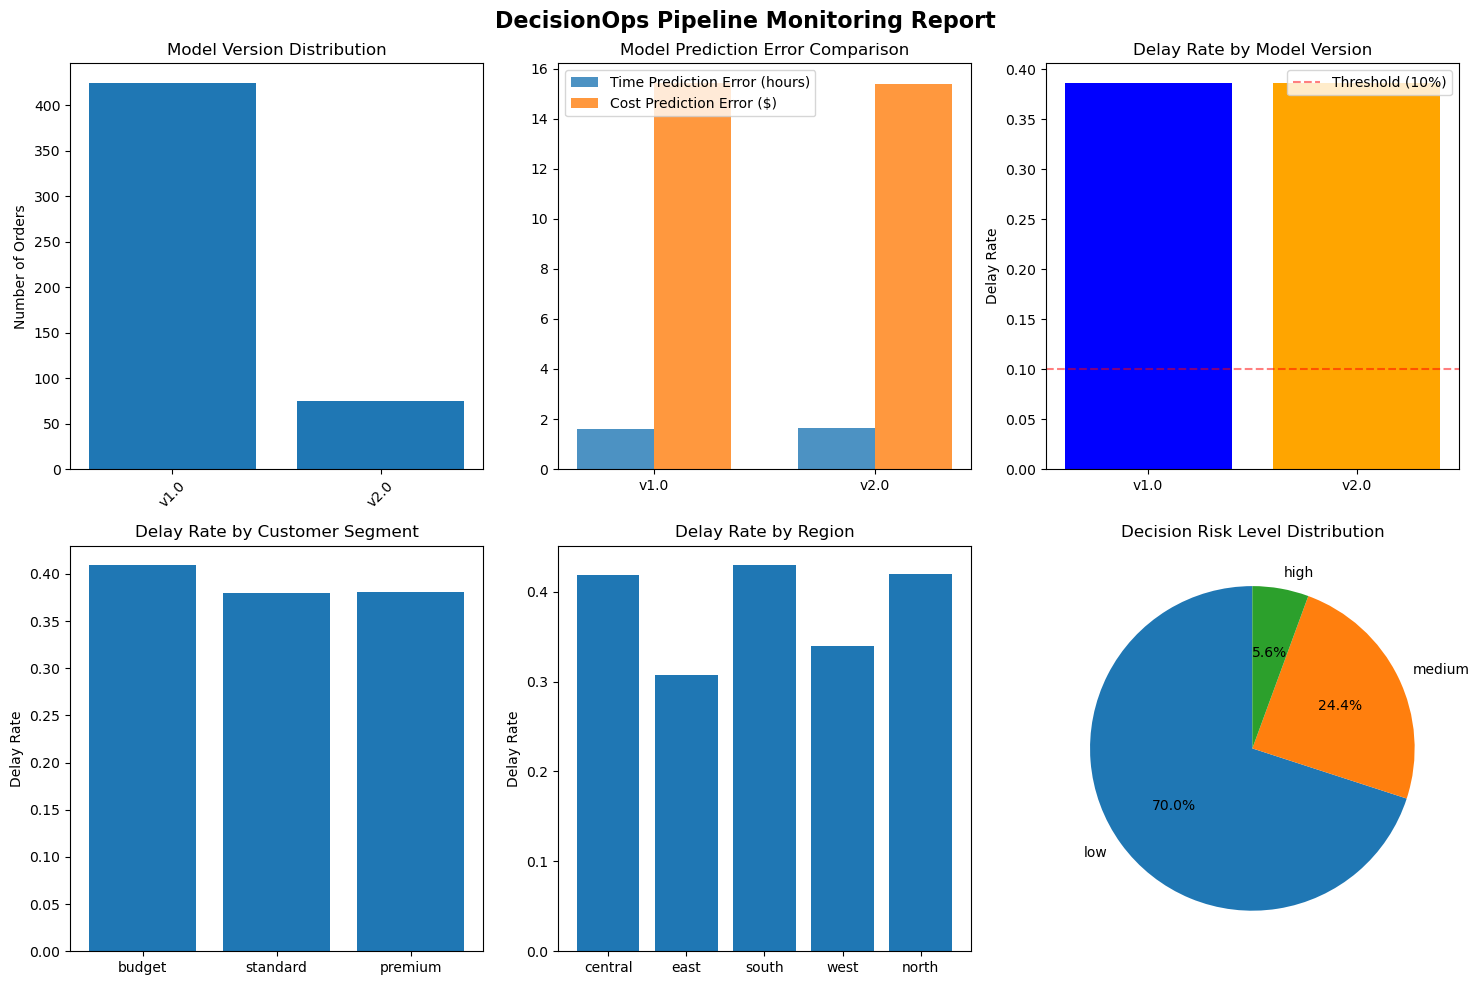

Visual report saved as 'decisionops_audit_report.png'

DecisionOps Pipeline Audit Report

1. Process Overview:
   Total records: 500
   Audit log entries: 3
   Number of model versions: 2

2. Performance Metrics Summary:

   Version v1.0:
     time_prediction_error: 1.6039
     cost_prediction_error: 15.4422
     delay_rate: 0.3859

   Version v2.0:
     time_prediction_error: 1.6413
     cost_prediction_error: 15.3735
     delay_rate: 0.3867

3. Audit Log Summary:
   1. [2025-12-13 10:15:46] Canary Release - Deployment
   2. [2025-12-13 10:15:46] Performance Monitoring - Evaluation
   3. [2025-12-13 10:15:46] Ethical Audit - Review

4. Recommendations:
   - Continuously monitor the performance of the new model version
   - Perform regular ethical audits to ensure fairness
   - Establish automated rollback mechanisms
   - Improve feedback loops and retraining mechanisms


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class DecisionOpsPipeline:
    """
    Implements a traceable DecisionOps pipeline, including canary release, monitoring, and ethical audit nodes.
    
    Input parameters:
    - data: FastShip dataset DataFrame
    
    Output:
    - Complete DecisionOps pipeline report
    - Visual charts showing results from each stage
    - Pipeline audit log
    
    Main functions:
    1. Implements a canary release mechanism
    2. Monitors model performance and decision outcomes
    3. Performs ethical audits
    4. Generates a traceable, complete process log
    """
    
    def __init__(self, data):
        self.data = data
        self.audit_log = []
        self.performance_metrics = {}
        
    def log_audit_event(self, stage, event_type, description, details):
        """Logs an audit event to the log."""
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        log_entry = {
            'timestamp': timestamp,
            'stage': stage,
            'event_type': event_type,
            'description': description,
            'details': details
        }
        self.audit_log.append(log_entry)
        print(f"[{timestamp}] {stage} - {event_type}: {description}")
        
    def canary_release(self, new_model_version='v2.0', canary_percentage=0.1):
        """
        Implements a canary release.
        
        Input:
        - new_model_version: New model version
        - canary_percentage: Canary release percentage
        
        Output:
        - Updated dataset with assigned model versions
        """
        print("\n" + "="*50)
        print("Stage 1: Canary Release")
        print("="*50)
        
        # Randomly select a portion of traffic to use the new model
        n_records = len(self.data)
        n_canary = int(n_records * canary_percentage)
        canary_indices = np.random.choice(self.data.index, n_canary, replace=False)
        
        # Create a model version column (if it doesn't exist)
        if 'deployed_model_version' not in self.data.columns:
            self.data['deployed_model_version'] = 'v1.0'  # Default version
            
        # Update to the new model version
        self.data.loc[canary_indices, 'deployed_model_version'] = new_model_version
        
        # Log an audit event
        self.log_audit_event(
            stage="Canary Release",
            event_type="Deployment",
            description=f"Started canary release for new model {new_model_version}",
            details={
                'new_model_version': new_model_version,
                'canary_percentage': canary_percentage,
                'affected_records': n_canary,
                'total_records': n_records
            }
        )
        
        # Statistics on version distribution
        version_dist = self.data['deployed_model_version'].value_counts()
        print(f"Model version distribution:\n{version_dist}")
        
        return self.data
    
    def monitor_performance(self):
        """
        Monitors model performance and decision outcomes.
        
        Output:
        - Performance metrics dictionary
        - Performance monitoring report
        """
        print("\n" + "="*50)
        print("Stage 2: Performance Monitoring")
        print("="*50)
        
        metrics = {}
        
        # 1. Model performance metrics (by version)
        for version in self.data['deployed_model_version'].unique():
            version_data = self.data[self.data['deployed_model_version'] == version]
            
            # Prediction accuracy (delivery time prediction error)
            time_error = abs(version_data['actual_delivery_time_hours'] - 
                            version_data['predicted_delivery_time_hours']).mean()
            
            # Cost prediction error
            cost_error = abs(version_data['actual_cost_usd'] - 
                            version_data['predicted_cost_usd']).mean()
            
            # Delay rate
            delay_rate = version_data['is_delayed'].mean()
            
            metrics[version] = {
                'time_prediction_error': time_error,
                'cost_prediction_error': cost_error,
                'delay_rate': delay_rate,
                'record_count': len(version_data)
            }
            
            print(f"\nModel version {version}:")
            print(f"  Record count: {len(version_data)}")
            print(f"  Time prediction error: {time_error:.2f} hours")
            print(f"  Cost prediction error: ${cost_error:.2f}")
            print(f"  Delay rate: {delay_rate:.2%}")
        
        # Log an audit event
        self.log_audit_event(
            stage="Performance Monitoring",
            event_type="Evaluation",
            description="Completed model performance evaluation",
            details=metrics
        )
        
        self.performance_metrics = metrics
        return metrics
    
    def ethical_audit(self):
        """
        Performs an ethical audit.
        
        Output:
        - Ethical audit report
        - Potential bias detection results
        """
        print("\n" + "="*50)
        print("Stage 3: Ethical Audit")
        print("="*50)
        
        audit_results = {}
        
        # 1. Fairness audit: Check delay rates across different customer segments
        print("\nFairness Audit - Delay rates by customer segment:")
        for segment in self.data['customer_segment'].unique():
            segment_data = self.data[self.data['customer_segment'] == segment]
            delay_rate = segment_data['is_delayed'].mean()
            audit_results[f'delay_rate_{segment}'] = delay_rate
            print(f"  {segment}: {delay_rate:.2%}")
        
        # 2. Regional fairness audit
        print("\nRegional Fairness Audit - Delay rates by region:")
        for region in self.data['customer_region'].unique():
            region_data = self.data[self.data['customer_region'] == region]
            delay_rate = region_data['is_delayed'].mean()
            audit_results[f'delay_rate_{region}'] = delay_rate
            print(f"  {region}: {delay_rate:.2%}")
        
        # 3. High-risk decision audit
        high_risk_decisions = self.data[self.data['decision_risk_level'] == 'high']
        audit_results['high_risk_count'] = len(high_risk_decisions)
        audit_results['high_risk_delay_rate'] = high_risk_decisions['is_delayed'].mean()
        
        print(f"\nHigh-Risk Decision Audit:")
        print(f"  Number of high-risk decisions: {len(high_risk_decisions)}")
        print(f"  High-risk decision delay rate: {high_risk_decisions['is_delayed'].mean():.2%}")
        
        # Log an audit event
        self.log_audit_event(
            stage="Ethical Audit",
            event_type="Review",
            description="Completed ethical audit",
            details=audit_results
        )
        
        return audit_results
    
    def visualize_results(self):
        """Visualizes the DecisionOps pipeline results."""
        print("\n" + "="*50)
        print("Generating Visual Report")
        print("="*50)
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('DecisionOps Pipeline Monitoring Report', fontsize=16, fontweight='bold')
        
        # 1. Model version distribution
        ax1 = axes[0, 0]
        version_counts = self.data['deployed_model_version'].value_counts()
        ax1.bar(version_counts.index, version_counts.values)
        ax1.set_title('Model Version Distribution')
        ax1.set_ylabel('Number of Orders')
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Prediction error comparison
        ax2 = axes[0, 1]
        versions = list(self.performance_metrics.keys())
        time_errors = [self.performance_metrics[v]['time_prediction_error'] for v in versions]
        cost_errors = [self.performance_metrics[v]['cost_prediction_error'] for v in versions]
        
        x = np.arange(len(versions))
        width = 0.35
        ax2.bar(x - width/2, time_errors, width, label='Time Prediction Error (hours)', alpha=0.8)
        ax2.bar(x + width/2, cost_errors, width, label='Cost Prediction Error ($)', alpha=0.8)
        ax2.set_title('Model Prediction Error Comparison')
        ax2.set_xticks(x)
        ax2.set_xticklabels(versions)
        ax2.legend()
        
        # 3. Delay rate comparison
        ax3 = axes[0, 2]
        delay_rates = [self.performance_metrics[v]['delay_rate'] for v in versions]
        ax3.bar(versions, delay_rates, color=['blue', 'orange', 'green'])
        ax3.set_title('Delay Rate by Model Version')
        ax3.set_ylabel('Delay Rate')
        ax3.axhline(y=0.1, color='r', linestyle='--', alpha=0.5, label='Threshold (10%)')
        ax3.legend()
        
        # 4. Customer segment delay rates
        ax4 = axes[1, 0]
        segments = self.data['customer_segment'].unique()
        segment_delays = [self.data[self.data['customer_segment'] == s]['is_delayed'].mean() 
                         for s in segments]
        ax4.bar(segments, segment_delays)
        ax4.set_title('Delay Rate by Customer Segment')
        ax4.set_ylabel('Delay Rate')
        
        # 5. Regional delay rates
        ax5 = axes[1, 1]
        regions = self.data['customer_region'].unique()
        region_delays = [self.data[self.data['customer_region'] == r]['is_delayed'].mean() 
                        for r in regions]
        ax5.bar(regions, region_delays)
        ax5.set_title('Delay Rate by Region')
        ax5.set_ylabel('Delay Rate')
        
        # 6. High-risk decision analysis
        ax6 = axes[1, 2]
        risk_levels = self.data['decision_risk_level'].unique()
        risk_counts = [len(self.data[self.data['decision_risk_level'] == r]) for r in risk_levels]
        ax6.pie(risk_counts, labels=risk_levels, autopct='%1.1f%%', startangle=90)
        ax6.set_title('Decision Risk Level Distribution')
        
        plt.tight_layout()
        plt.savefig('decisionops_audit_report.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("Visual report saved as 'decisionops_audit_report.png'")
    
    def generate_audit_report(self):
        """Generates a complete audit report."""
        print("\n" + "="*50)
        print("DecisionOps Pipeline Audit Report")
        print("="*50)
        
        print("\n1. Process Overview:")
        print(f"   Total records: {len(self.data)}")
        print(f"   Audit log entries: {len(self.audit_log)}")
        print(f"   Number of model versions: {len(self.data['deployed_model_version'].unique())}")
        
        print("\n2. Performance Metrics Summary:")
        for version, metrics in self.performance_metrics.items():
            print(f"\n   Version {version}:")
            for metric_name, value in metrics.items():
                if metric_name != 'record_count':
                    print(f"     {metric_name}: {value:.4f}")
        
        print("\n3. Audit Log Summary:")
        for i, log in enumerate(self.audit_log[-5:], 1):  # Show the last 5 entries
            print(f"   {i}. [{log['timestamp']}] {log['stage']} - {log['event_type']}")
        
        print("\n4. Recommendations:")
        print("   - Continuously monitor the performance of the new model version")
        print("   - Perform regular ethical audits to ensure fairness")
        print("   - Establish automated rollback mechanisms")
        print("   - Improve feedback loops and retraining mechanisms")
        
        return self.audit_log

# Main execution program
if __name__ == "__main__":
    # Load data
    print("Loading FastShip dataset...")
    try:
        df = pd.read_csv('fastship_data.csv')
        print(f"Dataset loaded successfully, shape: {df.shape}")
    except FileNotFoundError:
        print("Dataset not found. Please run the first code block to generate data first.")
        df = None
        
    if df is not None:
        # Create an instance of the DecisionOps pipeline
        pipeline = DecisionOpsPipeline(df)
        
        # Execute the complete pipeline
        # 1. Canary release
        df = pipeline.canary_release(new_model_version='v2.0', canary_percentage=0.15)
        
        # 2. Performance monitoring
        metrics = pipeline.monitor_performance()
        
        # 3. Ethical audit
        audit_results = pipeline.ethical_audit()
        
        # 4. Visualize results
        pipeline.visualize_results()
        
        # 5. Generate audit report
        audit_log = pipeline.generate_audit_report()